<ipython-input-19-d3a650b38e07>:26: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  Rad_wvp=g16nc.variables['Rad'][:]


0.8810773


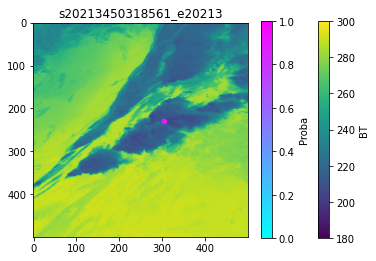

1.306413


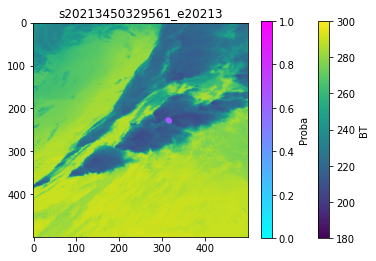

2.1227636


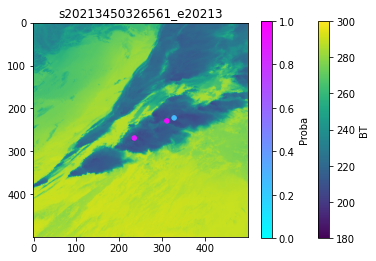

0.8756898


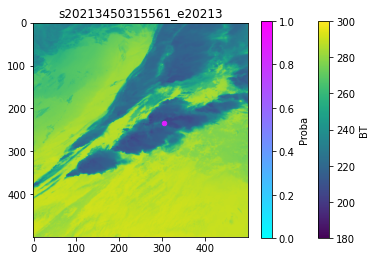

0.81608576


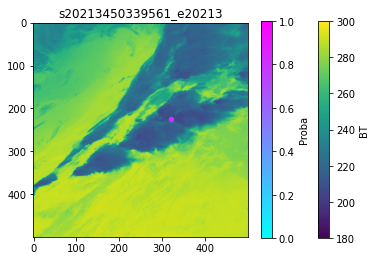

0.736582


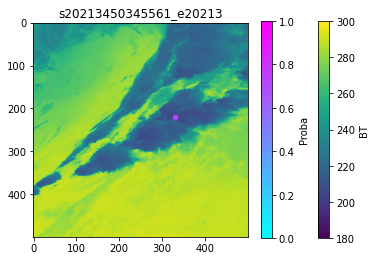

2.1574047


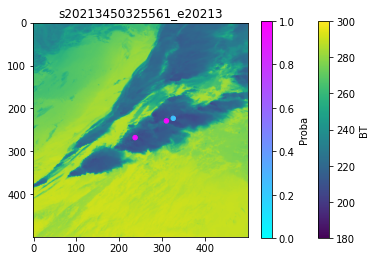

1.7650728


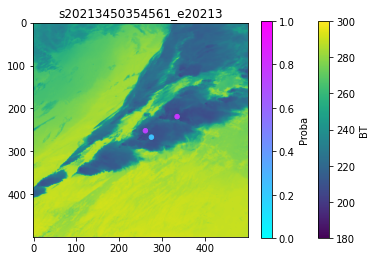

1.8279285


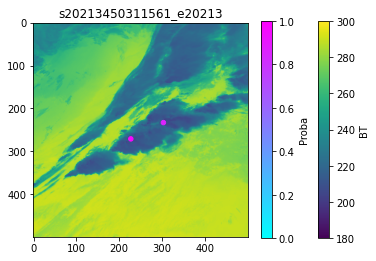

1.4909625


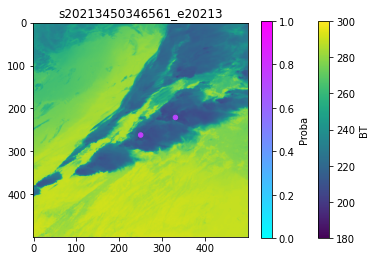

1.0394385


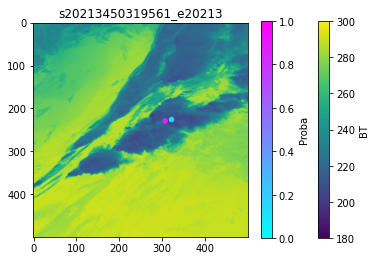

0.84270835


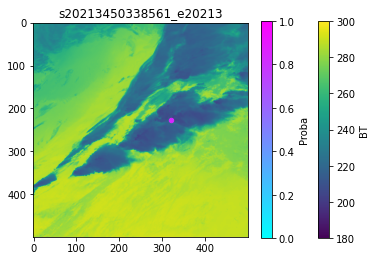

2.0445752


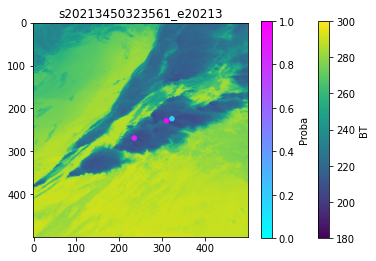

0.82696474


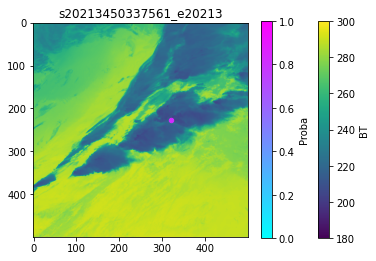

1.2927927


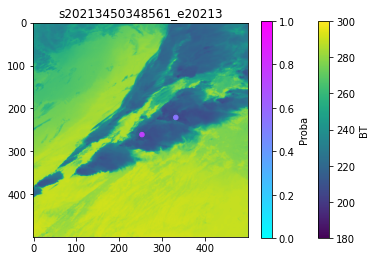

0.9078935


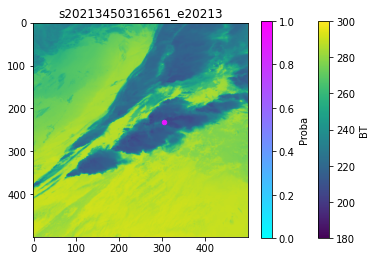

1.3407947


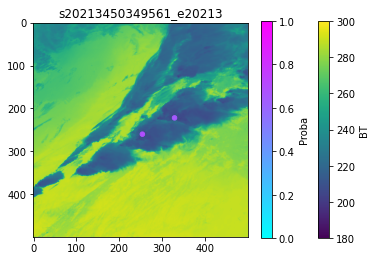

0.59988856


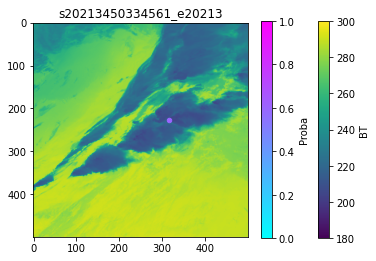

1.1078827


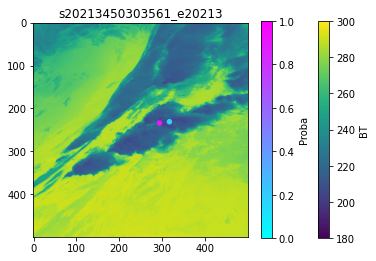

2.4577112


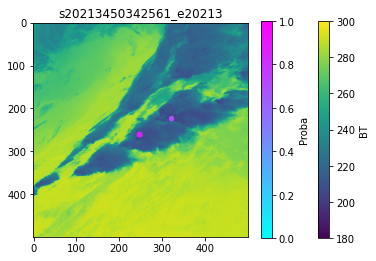

0.824008


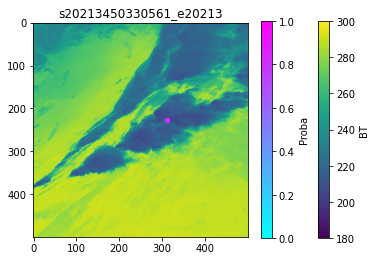

0.59850866


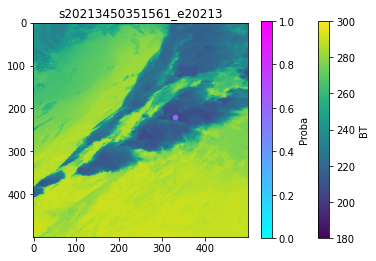

1.6597841


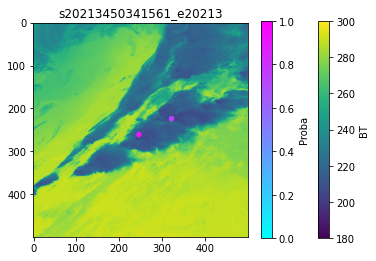

0.7504192


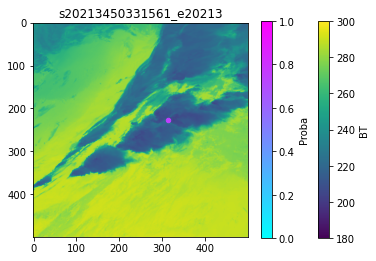

1.4045572


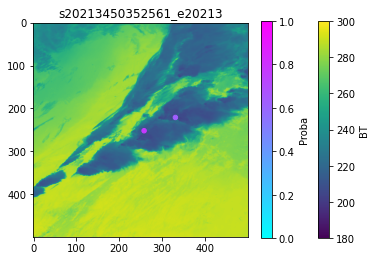

0.89630866


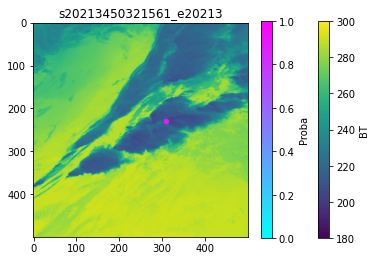

1.7446824


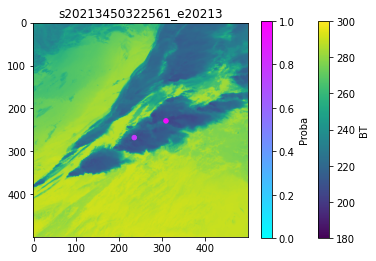

0.8365385


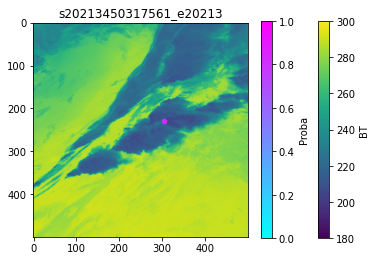

0.9614995


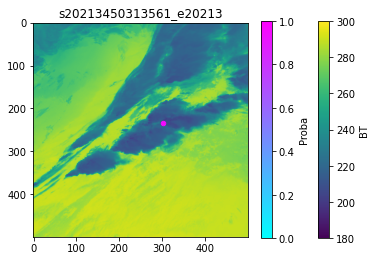

0.455522


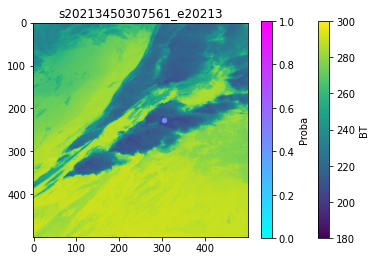

1.8183165


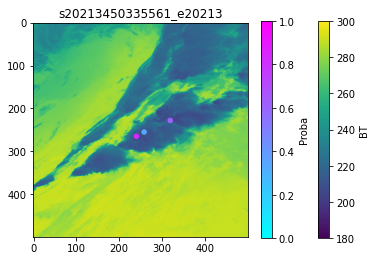

2.4220853


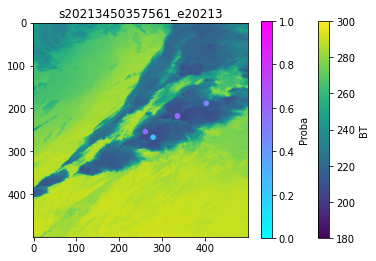

1.8137596


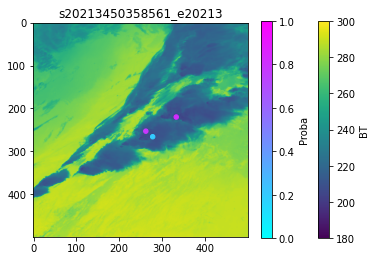

2.8942342


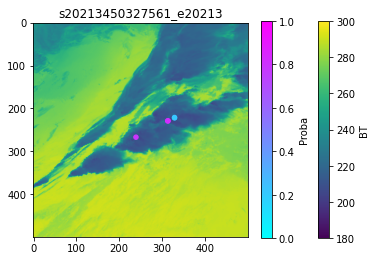

0.7096404


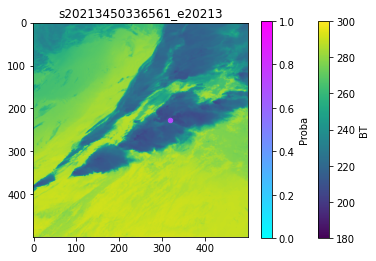

0.95059216


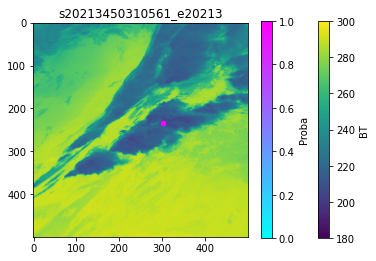

0.7538855


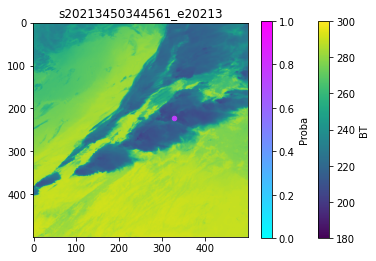

2.451604


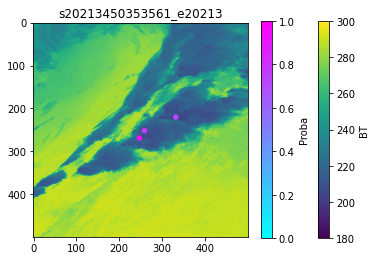

0.90623355


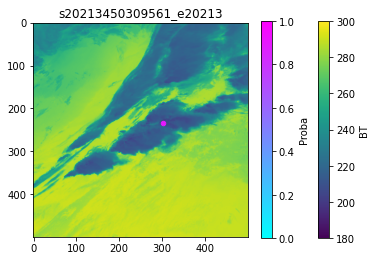

0.9425472


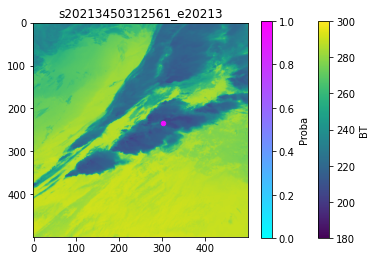

1.23676


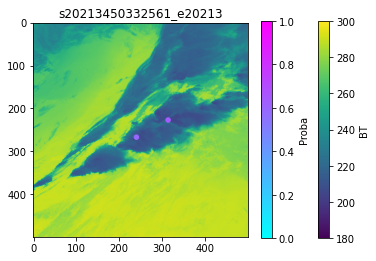

0.4644611


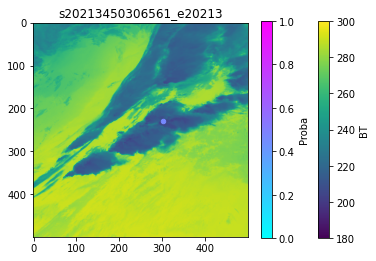

2.0313241


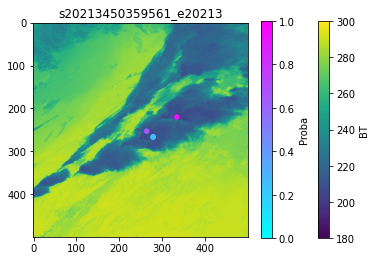

1.1788756


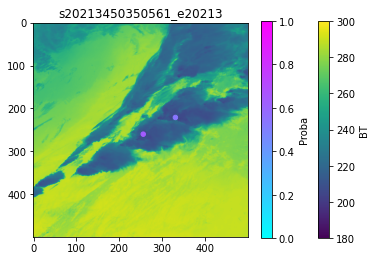

0.7372004


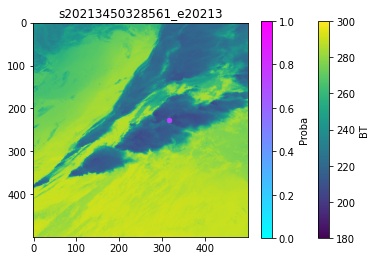

3.0374088


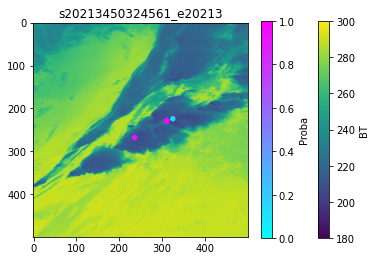

1.4941075


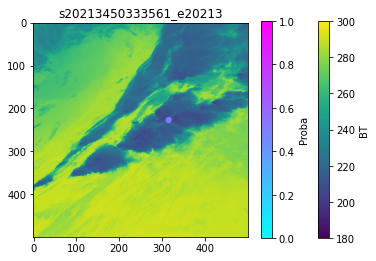

0.64833355


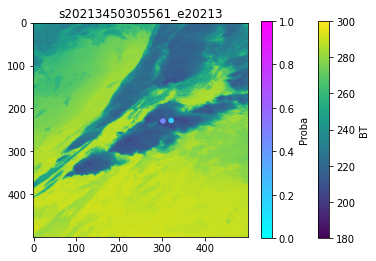

0.97029495


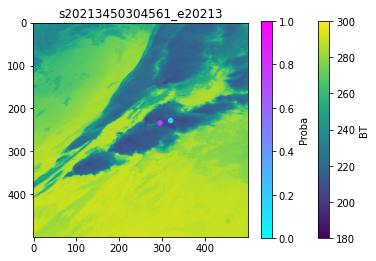

0.8950105


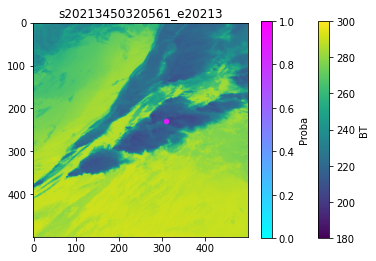

1.1314437


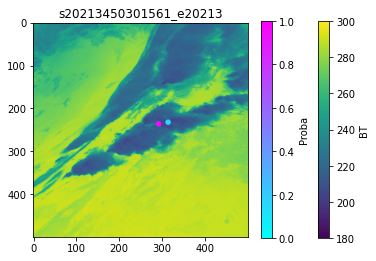

0.9563203


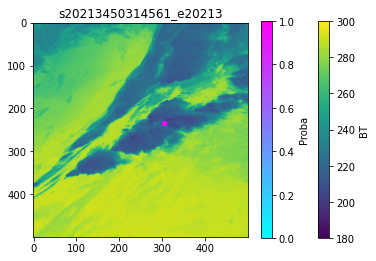

1.1887406


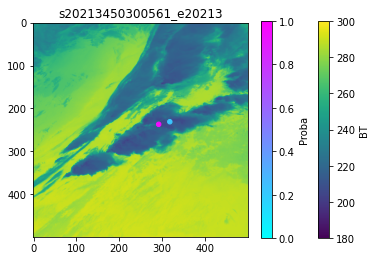

0.8138768


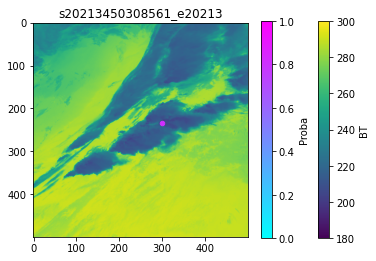

2.5389612


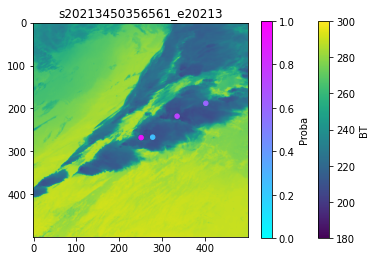

1.9467628


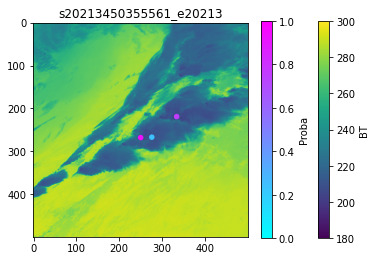

0.96150404


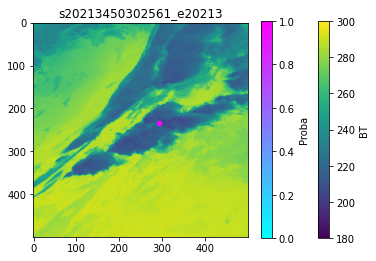

2.0552695


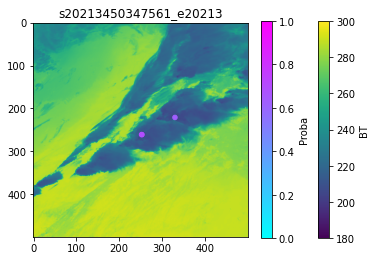

1.4761513


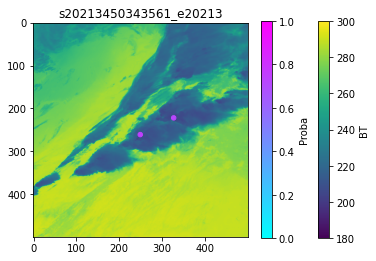

1.8475617


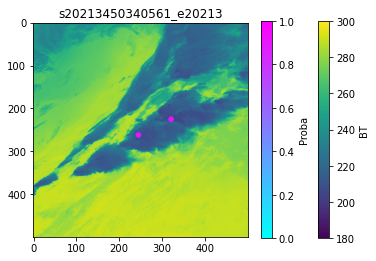

finish


In [19]:
#matplotlib inline
from netCDF4 import Dataset
from pyhdf.SD import SD, SDC
import h5py
import numpy as np
import os, os.path
import matplotlib.pyplot as plt
import glob

OT_data_dir='/data/keeling/a/yulanh/c/OT_output/tornado/'
BT_data_dir='/data/accp/a/snesbitt/goes-mds-tornado/'


#BT_fname=glob.glob(BT_data_dir+'OR_ABI-L1b-RadM2-M6C14_G16_s20213450322261*')
fname=glob.glob(BT_data_dir+'OR_ABI-L1b-RadM1-M6C14_G16_s202134503*')
#print(BT_fname)

#=== read BT data ======
for BT_fname in fname:
    
    g16nc = Dataset(BT_fname,'r')
    fk1_wvp=g16nc.variables['planck_fk1'][:]
    fk2_wvp=g16nc.variables['planck_fk2'][:]
    bc1_wvp=g16nc.variables['planck_bc1'][:]
    bc2_wvp=g16nc.variables['planck_bc2'][:]
    Rad_wvp=g16nc.variables['Rad'][:]
    g16nc.close()
    g16nc = None

    BT_wvp=[fk2_wvp/(np.log((fk1_wvp/Rad_wvp)+1))-bc1_wvp]/bc2_wvp
    xdim=Rad_wvp.shape[0]
    ydim=Rad_wvp.shape[1]
    BT_wvp=BT_wvp.reshape(xdim,ydim)
    #print(BT_wvp.min())
    #=== to plot =============
    p0=plt.imshow(BT_wvp,vmin=180,vmax=300)
    #plt.xlim([200,350])
    #plt.ylim([100,250])
    plt.title(BT_fname[-50:-28])
    plt.colorbar(p0,label='BT')
    
    OT_fname=glob.glob(OT_data_dir+'OR_ABI-L1b-RadM1-OT_C0814_G16_'+BT_fname[-50:-28]+'*')
    OT_fname=OT_fname[0]
    #==== read OT data =====
    fid = h5py.File(OT_fname,'r')
    OT_prob= fid['OT_probability'] [:]

    index=np.where(OT_prob > 0)
    print(np.sum(OT_prob))
    xy=np.array(index)
    x=xy.tolist()
    colors=OT_prob[index]
    p1=plt.scatter(x[1],x[0],s=20,c=colors,cmap=plt.get_cmap('cool'),vmin=0,vmax=1)
    plt.colorbar(p1,label='Proba') 
    plt.show()
print('finish')

In [14]:
print(BT_fname,BT_fname[-50:-28])

/data/accp/a/snesbitt/goes-mds-tornado/OR_ABI-L1b-RadM2-M6C14_G16_s20213450322261_e20213450322318_c20213450322374.nc s20213450322261_e20213
